In [364]:
from scipy.optimize import linprog
import numpy as np

# import random
import matplotlib.pyplot as plt


In [365]:
def plot_price_curve(price_curve: list) -> None:
    """Plot the price curve for a day

    Args:
        price_curve: list of float, the price curve in NOK per kWh

    Returns:
        None
    """
    import matplotlib.pyplot as plt
    plt.step(range(24), price_curve, where="post")
    plt.xlabel("Hour")
    plt.xticks(range(24), [f"{i}:00" for i in range(24)], rotation=45)
    plt.ylabel("NOK per kWh")
    plt.title("Generated price curve for a day")
    plt.ylim(0)
    plt.show()



def plot_price_curve_vs_usage(price_curve: list, usage: list) -> None:
    """Plot the price curve and the usage curve in the same graph

    Args:
        price_curve: list of float, the price curve in NOK per kWh
        usage: list of float, the usage in kWh for each hour.

    Returns:
        None
    """
    price_curve = list(price_curve)
    usage = list(usage)

    # appending 0 to the end of the lists to make them the same length
    price_curve.append(0)
    usage.append(0)

    # plotting the optimal power usage against the price curve
    plt.step(range(25), price_curve, label="Price curve (NOK/kWh)", where="post")
    plt.step(range(25), usage, label="Optimal power usage (kWh)", where="post")
    plt.title("Optimal power usage vs. price curve")
    plt.xlabel("Hour")
    plt.xticks(range(25), [f"{i}:00" for i in range(25)], rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

def print_price_curve(price_curve: list) -> None:
    """Print the price curve in a human readable format

    Args:
        price_curve: list of float, the price curve in NOK per kWh

    Returns:
        None
    """
    print("Price curve for a day:")
    print("-" * 30)
    print(f"{'Hour':<4} {'Time of day':<13} {'NOK per kWh':>10}")
    print("-" * 30)
    for hour, price in enumerate(price_curve):
        print(f"{hour + 1:<4} ({hour:02d}.00-{hour + 1:02d}.00) {price:>10.2f}")
    print("-" * 30)



def print_optimal_usage(costs: list, usage: list):
    """Print the optimal usage in a human readable format

    Args:
        costs: list of float, the price curve in NOK per kWh
        usage: list of float, the usage in kWh for each hour. Example: [(10, 5.5)] for 5.5 kWh at 10:00am

    Returns:
        None
    """
    # Calculating the total cost of the usage

    total_cost = sum([costs[i] * usage for i, usage in enumerate(usage)])

    print("Optimal power usage for each hour:")
    print("-" * 60)
    print(f"{'Hour':<4} | {'Time of day':<13} | {'NOK per kWh':>15} | {'Usage (kWh)':>15}")
    print("-" * 60)
    for hour, usage in enumerate(usage):
        print(
            f"{hour + 1:<4} | ({hour:02d}.00-{hour + 1:02d}.00) | {costs[hour]:>15.2f} | {usage:>15.2f}"
        )
    print("-" * 60)
    print(f"{'Total cost:':<37} {total_cost:>15.2f} NOK")


# Question 1


In [381]:
# Constants
peak_cost = 1  # dollars per kWh during peak hours
non_peak_cost = 0.5  # dollars per kWh during non-peak hours
peak_hours = range(17, 20)  # Peak hours from 5:00pm to 8:00pm

# Power requirements for each applicant (in kWh)
power_requirements = [1.94, 9.9, 1.44]  # Laundry machine  # EV charger  # Dishwasher

# Objective function coefficients (cost per kWh)
costs = [non_peak_cost if hour not in peak_hours else peak_cost for hour in range(24)]

# Construct the constraint matrix (each row represents an applicant's power usage)
A_eq = np.zeros((4, 24))  # 4 rows for each applicant and one for the total power usage
for i in range(3):
    A_eq[i, i * 8 : (i + 1) * 8] = (
        1  # Assign 1 to the corresponding hours for each applicant
    )
A_eq[3, :] = 1  # Total power usage constraint

# Define the right-hand side vector (power requirements)
b_eq = power_requirements + [
    sum(power_requirements)
]  # Power requirements for each applicant and total power requirement

# Solve the linear programming problem
result = linprog(costs, A_eq=A_eq, b_eq=b_eq)

# Extract the optimal power usage
optimal_usage = result.x

# plot_price_curve(costs)
# plot_price_curve_vs_usage(costs, optimal_usage)
print_optimal_usage(costs, optimal_usage)
# print(A_eq)



Optimal power usage for each hour:
------------------------------------------------------------
Hour | Time of day   |     NOK per kWh |     Usage (kWh)
------------------------------------------------------------
1    | (00.00-01.00) |            0.50 |            1.94
2    | (01.00-02.00) |            0.50 |            0.00
3    | (02.00-03.00) |            0.50 |            0.00
4    | (03.00-04.00) |            0.50 |            0.00
5    | (04.00-05.00) |            0.50 |            0.00
6    | (05.00-06.00) |            0.50 |            0.00
7    | (06.00-07.00) |            0.50 |            0.00
8    | (07.00-08.00) |            0.50 |            0.00
9    | (08.00-09.00) |            0.50 |            9.90
10   | (09.00-10.00) |            0.50 |            0.00
11   | (10.00-11.00) |            0.50 |            0.00
12   | (11.00-12.00) |            0.50 |            0.00
13   | (12.00-13.00) |            0.50 |            0.00
14   | (13.00-14.00) |            0.50 |     

# Question 2


## Generating price curve (RTP)


In [367]:
def generate_price_curve_RTP(peak_hours: list) -> list:
    """Generate a random real-time price curve for a day

    Returns:
        list of float: the price curve in NOK per kWh
    """
    import random

    # Setting the seed to make the results reproducible
    random.seed(6)

    # Generating a random price curve that is higher during peak hours
    price_curve = [
        random.uniform(1, 1.5) if i in peak_hours else random.uniform(0.6, 0.7)
        for i in range(24)
    ]

    return price_curve


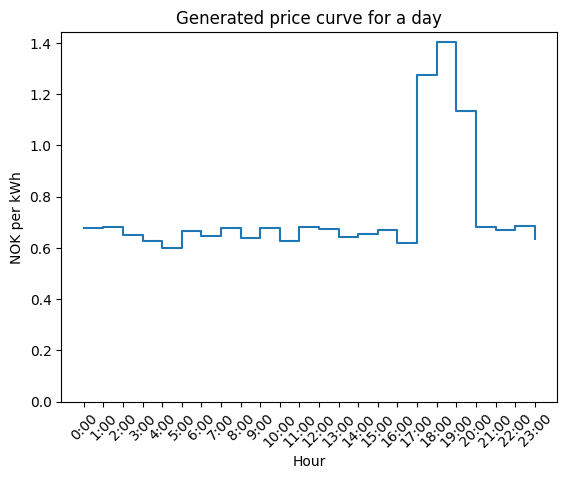

Price curve for a day:
------------------------------
Hour Time of day   NOK per kWh
------------------------------
1    (00.00-01.00)       0.68
2    (01.00-02.00)       0.68
3    (02.00-03.00)       0.65
4    (03.00-04.00)       0.63
5    (04.00-05.00)       0.60
6    (05.00-06.00)       0.67
7    (06.00-07.00)       0.65
8    (07.00-08.00)       0.68
9    (08.00-09.00)       0.64
10   (09.00-10.00)       0.68
11   (10.00-11.00)       0.63
12   (11.00-12.00)       0.68
13   (12.00-13.00)       0.67
14   (13.00-14.00)       0.64
15   (14.00-15.00)       0.65
16   (15.00-16.00)       0.67
17   (16.00-17.00)       0.62
18   (17.00-18.00)       1.28
19   (18.00-19.00)       1.40
20   (19.00-20.00)       1.13
21   (20.00-21.00)       0.68
22   (21.00-22.00)       0.67
23   (22.00-23.00)       0.68
24   (23.00-24.00)       0.63
------------------------------


In [368]:
costs = generate_price_curve_RTP(peak_hours)
plot_price_curve(costs)
print_price_curve(costs)


## Appliances


In [369]:
# Constants
peak_hours = range(17, 20)  # Peak hours from 5:00pm to 8:00pm
# Power requirements and time constraints for each appliance
appliances = [
    # non-shiftable loads
    {"power": 2, "hours": range(10, 20)},  # Lighting
    {"power": 9.6, "hours": range(0, 23)},  # Heating
    {"power": 1.32, "hours": range(0, 23)},  # Refrigerator
    {
        "power": 3.9,
        "hours": [8, 9, 11, 12, 17, 18],
    },  # Stove
    {"power": 0.6, "hours": range(17, 22)},  # TV
    {"power": 0.6, "hours": range(17, 22)},  # Computer
    {"power": 0.144, "hours": range(0, 23)},  # Router
    {"power": 0.84, "hours": range(0, 23)},  # Separate freezer
    {"power": 1.2, "hours": range(17, 18)},  # Microwave
    # shiftable loads
    {"power": 1.44, "hours": range(24)},  # Dishwasher
    {"power": 1.94, "hours": range(24)},  # Laundry machine
    {"power": 2.5, "hours": range(24)},  # Dryer
    {"power": 9.9, "hours": range(24)},  # EV
]

non_shiftable_appliances = appliances[:9]
shiftable_appliances = appliances[9:]


## Plotting code q2


In [370]:
# # Generate a random real-time price curve for a day
# costs = generate_price_curve_RTP(peak_hours)

# # Get the lowest priced hour of the day
# lowest_price = min(costs)
# lowest_price_hour = costs.index(lowest_price)

# print(
#     f"The lowest price of the day is {lowest_price} NOK/kWh at {lowest_price_hour}:00"
# )

# # Initialize the optimal power usage for each hour
# optimal_usage = [0] * 24

# # Get the power requirements for the shiftable appliances
# shiftable_power_requirements = [
#     appliance["power"] for appliance in shiftable_appliances
# ]


# # Distribute the power requirements for the shiftable appliances to the lowest price hour
# optimal_usage[lowest_price_hour] = sum(shiftable_power_requirements)


# # Distribute the power requirements to the non-shiftable applicants
# for appliance in non_shiftable_appliances:
#     for hour in appliance["hours"]:
#         optimal_usage[hour] += appliance["power"] / len(appliance["hours"])

# plot_price_curve_vs_usage(costs, optimal_usage)
# print_optimal_usage(costs, optimal_usage)


## Optimization q2


### SciPy.linprog package


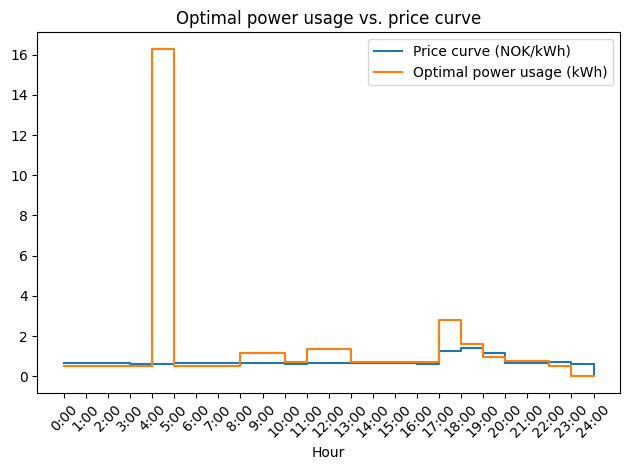

Optimal power usage for each hour:
------------------------------------------------------------
Hour | Time of day   |     NOK per kWh |     Usage (kWh)
------------------------------------------------------------
1    | (00.00-01.00) |            0.68 |            0.52
2    | (01.00-02.00) |            0.68 |            0.52
3    | (02.00-03.00) |            0.65 |            0.52
4    | (03.00-04.00) |            0.63 |            0.52
5    | (04.00-05.00) |            0.60 |           16.30
6    | (05.00-06.00) |            0.67 |            0.52
7    | (06.00-07.00) |            0.65 |            0.52
8    | (07.00-08.00) |            0.68 |            0.52
9    | (08.00-09.00) |            0.64 |            1.17
10   | (09.00-10.00) |            0.68 |            1.17
11   | (10.00-11.00) |            0.63 |            0.72
12   | (11.00-12.00) |            0.68 |            1.37
13   | (12.00-13.00) |            0.67 |            1.37
14   | (13.00-14.00) |            0.64 |     

In [371]:
RTP_costs = np.array(generate_price_curve_RTP(peak_hours))
p = np.array([appliance["power"] for appliance in shiftable_appliances])
costs = np.tile(RTP_costs, len(p))
# e = np.ones((24, 4))
A_eq = np.kron(np.eye(len(p)), np.ones((1, 24)))

# print(f"Shape of RTP_costs = {RTP_costs.shape}, e.T = {e.T.shape} and p = {p.shape}")
# print(np.eye(len(p)))
# print("c= ", RTP_costs)
# print("A_eq= ", A_eq)
# print("p= ", p)

# Solve the linear programming problem
result = linprog(costs, A_eq=A_eq, b_eq=p)

# print(result.x)

# Extract the optimal power usage and reshape it to get the usage for each appliance at each hour
optimal_usage = result.x.reshape(-1, 24)

# print(optimal_usage)

# sum the power usage for each hour
optimal_usage = np.sum(optimal_usage, axis=0)

# add non-shiftable appliances to the optimal_usage
for appliance in non_shiftable_appliances:
    for hour in appliance["hours"]:
        optimal_usage[hour] += appliance["power"] / len(appliance["hours"])

plot_price_curve_vs_usage(RTP_costs, optimal_usage)
print_optimal_usage(costs, optimal_usage)


### Pulp

# Question 3


## Plotting code


In [372]:
# costs = generate_price_curve_RTP(peak_hours)
# optimal_usage = np.zeros_like(costs)

# # power_requirements for the shiftable applicants excluding EV
# EV_power_requirement = shiftable_appliances[-1]["power"]
# shiftable_power_requirements = [
#     appliance["power"] for appliance in shiftable_appliances[:-1]
# ]

# # Distribute the power requirements to the lowest price hour
# optimal_usage[lowest_price_hour] = (
#     sum(shiftable_power_requirements) * 30 + EV_power_requirement * 5
# )

# # Distribute the power requirements to the non-shiftable applicants
# for appliance in non_shiftable_appliances:
#     for hour in appliance["hours"]:
#         optimal_usage[hour] += appliance["power"] / len(appliance["hours"]) * 30

# plot_price_curve_vs_usage(costs, optimal_usage)
# print_optimal_usage(costs, optimal_usage)


## Optimization using loop


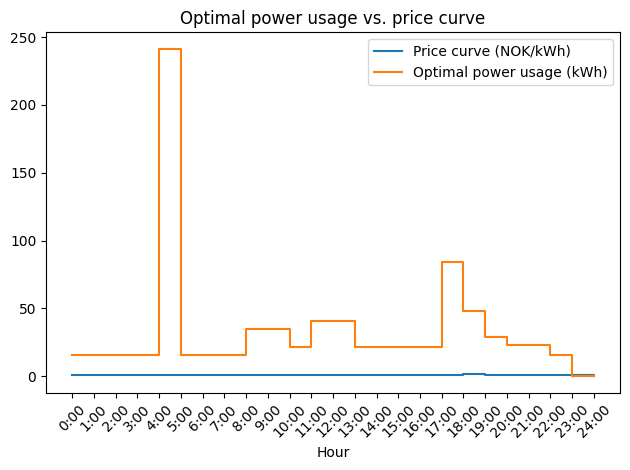

Optimal power usage for each hour:
------------------------------------------------------------
Hour | Time of day   |     NOK per kWh |     Usage (kWh)
------------------------------------------------------------
1    | (00.00-01.00) |            0.68 |           15.53
2    | (01.00-02.00) |            0.68 |           15.53
3    | (02.00-03.00) |            0.65 |           15.53
4    | (03.00-04.00) |            0.63 |           15.53
5    | (04.00-05.00) |            0.60 |          241.43
6    | (05.00-06.00) |            0.67 |           15.53
7    | (06.00-07.00) |            0.65 |           15.53
8    | (07.00-08.00) |            0.68 |           15.53
9    | (08.00-09.00) |            0.64 |           35.03
10   | (09.00-10.00) |            0.68 |           35.03
11   | (10.00-11.00) |            0.63 |           21.53
12   | (11.00-12.00) |            0.68 |           41.03
13   | (12.00-13.00) |            0.67 |           41.03
14   | (13.00-14.00) |            0.64 |     

In [373]:
RTP_costs = np.array(generate_price_curve_RTP(peak_hours))
EV_power_requirement = shiftable_appliances[-1]["power"]
p = np.array([appliance["power"] for appliance in shiftable_appliances[:-1]])
NUM_HOUSEHOLDS = 30
NUM_HOUSEHOlDS_WITH_EV = 5

# Initialize an array to store the optimal usage for each hour
optimal_usage = np.zeros_like(RTP_costs)

# Create a binary vector for the constraints
e = np.ones((1, 24))

# For each shiftable appliance
for i, appliance_power in enumerate(p):
    # Solve the linear programming problem for this appliance
    result = linprog(RTP_costs, A_eq=e, b_eq=np.array([appliance_power]))

    # Add the optimal usage for this appliance to the total optimal usage
    optimal_usage += result.x * NUM_HOUSEHOLDS

# Solve the linear programming problem for the EV
result_EV = linprog(RTP_costs, A_eq=e, b_eq=np.array([EV_power_requirement]))
optimal_usage += result_EV.x * NUM_HOUSEHOlDS_WITH_EV

# Add non-shiftable appliances to the optimal_usage
for appliance in non_shiftable_appliances:
    for hour in appliance["hours"]:
        optimal_usage[hour] += appliance["power"] * 30 / len(appliance["hours"])

plot_price_curve_vs_usage(RTP_costs, optimal_usage)
print_optimal_usage(costs, optimal_usage)


# Question 4


In [374]:
# # Constants
# total_power_limit = 2  # Maximum total power usage per hour


# # Objective function coefficients (cost per kWh)
# costs = generate_price_curve_RTP(peak_hours)

# # Construct the constraint matrix (each row represents an hour)
# A_eq = np.zeros((24, 24))
# for hour in range(24):
#     for applicant in applicants:
#         if hour in applicant["hours"]:
#             A_eq[hour, hour] += 1  # Increment power usage for the corresponding hour

# # Define the right-hand side vector (power requirements)
# b_eq = [total_power_limit] * 24  # Total power usage limit for each hour

# # Solve the linear programming problem
# result = linprog(costs, A_eq=A_eq, b_eq=b_eq)

# # Extract the optimal power usage
# optimal_usage = result.x

# plot_price_curve_vs_usage(costs, optimal_usage)
# print_optimal_usage(optimal_usage)
